<a href="https://colab.research.google.com/github/Tanmay-2102/Nexus_ML/blob/main/Model_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [ ]:
df.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved


In [ ]:
df.shape

(134486, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134486 entries, 0 to 134485
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         134486 non-null  int64 
 1   TargetID                   134486 non-null  object
 2   DRUGID                     134486 non-null  object
 3   DRUGTYPE                   134486 non-null  object
 4   Drug_high_status           134486 non-null  object
 5   DRUGNAME                   134486 non-null  object
 6   PUBCHCID                   134486 non-null  int64 
 7   Disease_of_highest_status  134486 non-null  object
 8   Drug_Status                134486 non-null  object
 9   UNIPROID                   134486 non-null  object
 10  TARGNAME                   134486 non-null  object
 11  GENENAME                   134486 non-null  object
 12  SYNONYMS                   134486 non-null  object
 13  FUNCTION                   134486 non-null  

In [ ]:
df.describe()

,ID,PUBCHCID
count,134486.000000,1.344860e+05
mean,95958.384107,1.397308e+07
std,55524.645340,2.561885e+07
min,2.000000,1.190000e+02
25%,47764.250000,5.484100e+04
50%,96015.500000,5.280980e+06
75%,144131.750000,1.165886e+07
max,192122.000000,1.357437e+08


# Handling missing and duplicated values

In [ ]:
df1 = df.copy()

In [ ]:
df1.isnull().sum()

,0
ID,0
TargetID,0
DRUGID,0
DRUGTYPE,0
Drug_high_status,0
DRUGNAME,0
PUBCHCID,0
Disease_of_highest_status,0
Drug_Status,0
UNIPROID,0


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1['TargetID'].value_counts()

,count
TargetID,
T67162,6538
T59328,4037
T95913,4007
T78709,2853
T80975,2842
...,...
T87166,1
T92458,1
T75890,1


In [ ]:
df1['DRUGID'].value_counts()

,count
DRUGID,
D0O0LS,1997
D0W5HK,1601
D0H3HM,1439
D0AZ3C,1368
D0U3EP,1290
...,...
D09QOR,1
D0U1HP,1
D02LCL,1


In [ ]:
df1['DRUGTYPE'].value_counts()

,count
DRUGTYPE,
Small molecular drug,134082
Small molecule immunotherapy,192
Combination drug (small molecular drug),174
Combination drug (Antibody),24
Protein/peptide drug,12
Recombinant protein,2


In [ ]:
df1['Drug_high_status'].value_counts()

,count
Drug_high_status,
Approved,67042
Phase 2,17542
Phase 3,10119
Phase 1,6883
Investigative,6361
Terminated,5693
Discontinued in Phase 2,4897
Patented,2550
Discontinued in Phase 1,2535


In [ ]:
df1['DRUGNAME'].value_counts()

,count
DRUGNAME,
Entrectinib,1997
Sorafenib,1601
Aripiprazole,1439
Imatinib,1368
Resveratrol,1290
...,...
Eniluracil,1
Org-24461,1
T-5224,1


In [ ]:
df1['PUBCHCID'].value_counts()

,count
PUBCHCID,
25141092,1997
216239,1601
60795,1439
5291,1368
445154,1290
...,...
43157,1
23670635,1
23626877,1


In [ ]:
df1['Disease_of_highest_status'].value_counts()

,count
Disease_of_highest_status,
Solid tumour/cancer,13663
Schizophrenia,6818
Pain,3346
Breast cancer,2935
Obesity,2855
...,...
Urinary tract disease,1
Anaemia,1
Folate-deficiency anemia,1


In [ ]:
df1['Drug_Status'].value_counts()

,count
Drug_Status,
Approved,47869
Phase 2,24223
Phase 3,13539
Phase 1,10821
Investigative,7465
Terminated,6163
Discontinued in Phase 2,5754
Patented,3078
Discontinued in Phase 1,2735


In [ ]:
df1['UNIPROID'].value_counts()

,count
UNIPROID,
DRD2_HUMAN,6538
EGFR_HUMAN,4553
PK3CG_HUMAN,4007
5HT1A_HUMAN,2853
VGFR2_HUMAN,2842
...,...
CP24A_HUMAN,1
DPYD_HUMAN,1
NCPR_HUMAN,1


In [ ]:
df1['TARGNAME'].value_counts()

,count
TARGNAME,
Dopamine D2 receptor (D2R),6538
Epidermal growth factor receptor (EGFR),4037
PI3-kinase gamma (PIK3CG),4007
5-HT 1A receptor (HTR1A),2853
Vascular endothelial growth factor receptor 2 (KDR),2842
...,...
Glucokinase (GCK),1
Cytochrome P450 24 (CYP24A1),1
Dihydrothymine dehydrogenase (DPYD),1


In [ ]:
df1['GENENAME'].value_counts()

,count
GENENAME,
DRD2,6538
EGFR,4553
PIK3CG,4007
HTR1A,2853
KDR,2842
...,...
CYP24A1,1
GCK,1
NOX4,1


In [ ]:
df1['SYNONYMS'].value_counts()

,count
SYNONYMS,
Dopamine receptor 2; D(2) dopamine receptor,6538
Receptor tyrosine-protein kinase erbB-1; Proto-oncogene c-ErbB-1; HER1; ERBB1; ERBB,4037
"p120-PI3K; p110gamma; Serine/threonine protein kinase PIK3CG; PtdIns-3-kinase subunit p110-gamma; PtdIns-3-kinase subunit gamma; PtdIns-3-kinase p110; Phosphoinositol-3 kinase; Phosphoinositide-3-kinase catalytic gamma polypeptide; Phosphoinositide 3-Kinase gamma; Phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit, gamma isoform; Phosphatidylinositol 4,5-bisphosphate 3-kinase catalytic subunit gamma isoform; Phosphatidylinositol 4,5-bisphosphate 3-kinase 110 kDa catalytic subunit gamma; PI3Kgamma; PI3K-gamma; PI3K; PI3-kinase subunit gamma; PI3-kinase p110 subunit gamma",4007
Serotonin receptor 1A; G-21; ADRBRL1; ADRB2RL1; 5-hydroxytryptamine receptor 1A; 5-HT1A receptor; 5-HT1A; 5-HT-1A,2853
VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyrosine kinase receptor flk-1; Kinase insert domain receptor; Fetal liver kinase 1; FLK1; FLK-1; CD309,2842
...,...
Hexokinase type IV; Hexokinase D; HK4; HK IV,1
"Vitamin D(3) 24hydroxylase; Cytochrome P450CC24; CYP24A1; 24OHase; 1,25dihydroxyvitamin D(3) 24hydroxylase, mitochondrial",1
Dihydrouracil dehydrogenase; Dihydropyrimidine dehydrogenase [NADP(+)]; Dihydropyrimidine dehydrogenase; DPD; DHPDHase,1


In [ ]:
df1['FUNCTION'].value_counts()

,count
FUNCTION,
Dopamine receptor whose activity is mediated by G proteins which inhibit adenylyl cyclase.,6538
"Receptor tyrosine kinase binding ligands of the EGF family and activating several signaling cascades to convert extracellular cues into appropriate cellular responses. Known ligands include EGF, TGFA/TGF-alpha, AREG, epigen/EPGN, BTC/betacellulin, epiregulin/EREG and HBEGF/heparin-binding EGF. Ligand binding triggers receptor homo- and/or heterodimerization and autophosphorylation on key cytoplasmic residues. The phosphorylated receptor recruits adapter proteins like GRB2 which in turn activates complex downstream signaling cascades. Activates at least 4 major downstream signaling cascades including the RAS-RAF-MEK-ERK, PI3 kinase-AKT, PLCgamma-PKC and STATs modules. May also activate the NF-kappa-B signaling cascade. Also directly phosphorylates other proteins like RGS16, activating its GTPase activity and probably coupling the EGF receptor signaling to the G protein-coupled receptor signaling. Also phosphorylates MUC1 and increases its interaction with SRC and CTNNB1/beta-catenin. Plays a role in enhancing learning and memory performance (By similarity).",4553
"Phosphoinositide-3-kinase (PI3K) that phosphorylates PtdIns(4,5)P2 (Phosphatidylinositol 4,5-bisphosphate) to generate phosphatidylinositol 3,4,5-trisphosphate (PIP3). PIP3 plays a key role by recruiting PH domain-containing proteins to the membrane, including AKT1 and PDPK1, activating signaling cascades involved in cell growth, survival, proliferation, motility and morphology. Links G-protein coupled receptor activation to PIP3 production. Involved in immune, inflammatory and allergic responses. Modulates leukocyte chemotaxis to inflammatory sites and in response to chemoattractant agents. May control leukocyte polarization and migration by regulating the spatial accumulation of PIP3 and by regulating the organization of F-actin formation and integrin-based adhesion at the leading edge. Controls motility of dendritic cells. Together with PIK3CD is involved in natural killer (NK) cell development and migration towards the sites of inflammation. Participates in T-lymphocyte migration. Regulates T-lymphocyte proliferation and cytokine production. Together with PIK3CD participates in T-lymphocyte development. Required for B-lymphocyte development and signaling. Together with PIK3CD participates in neutrophil respiratory burst. Together with PIK3CD is involved in neutrophil chemotaxis and extravasation. Together with PIK3CB promotes platelet aggregation and thrombosis. Regulates alpha-IIb/beta-3 integrins (ITGA2B/ ITGB3) adhesive function in platelets downstream of P2Y12 through a lipid kinase activity-independent mechanism. May have also a lipid kinase activity-dependent function in platelet aggregation. Involved in endothelial progenitor cell migration. Negative regulator of cardiac contractility. Modulates cardiac contractility by anchoring protein kinase A (PKA) and PDE3B activation, reducing cAMP levels. Regulates cardiac contractility also by promoting beta-adrenergic receptor internalization by binding to GRK2 and by non-muscle tropomyosin phosphorylation. Also has serine/threonine protein kinase activity: both lipid and protein kinase activities are required for beta-adrenergic receptor endocytosis. May also have a scaffolding role in modulating cardiac contractility. Contributes to cardiac hypertrophy under pathological stress. Through simultaneous binding of PDE3B to RAPGEF3 and PIK3R6 is assembled in a signaling complex in which the PI3K gamma complex is activated by RAPGEF3 and which is involved in angiogenesis.",4007
"Functions as a receptor for various drugs and psychoactive substances. Ligand binding causes a conformation change that triggers signaling via guanine nucleotide-binding proteins (G proteins) and modulates the activity of down-stream effectors, such as adenylate cyclase. Beta-arrestin family members inhibit signaling via G proteins 

In [ ]:
df1['BIOCLASS'].value_counts()

,count
BIOCLASS,
GPCR rhodopsin,42785
Kinase,42240
Paired donor oxygen oxidoreductase,6846
Nuclear hormone receptor,5495
Peptidase,5388
...,...
Hepacivirus polyprotein,1
CH/CH donor oxidoreductase,1
Small GTPase,1


In [ ]:
df1['SEQUENCE'].value_counts()

,count
SEQUENCE,
MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIAVIVFGNVLVCMAVSREKALQTTTNYLIVSLAVADLLVATLVMPWVVYLEVVGEWKFSRIHCDIFVTLDVMMCTASILNLCAISIDRYTAVAMPMLYNTRYSSKRRVTVMISIVWVLSFTISCPLLFGLNNADQNECIIANPAFVVYSSIVSFYVPFIVTLLVYIKIYIVLRRRRKRVNTKRSSRAFRAHLRAPLKGNCTHPEDMKLCTVIMKSNGSFPVNRRRVEAARRAQELEMEMLSSTSPPERTRYSPIPPSHHQLTLPDPSHHGLHSTPDSPAKPEKNGHAKDHPKIAKIFEIQTMPNGKTRTSLKTMSRRKLSQQKEKKATQMLAIVLGVFIICWLPFFITHILNIHCDCNIPPVLYSAFTWLGYVNSAVNPIIYTTFNIEFRKAFLKILHC,6538
MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCNLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPKIPSIATGMVGALLLLLVVALGIGLFMRRRHIVRKRTLRRLLQERELVEPLTPSGEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIPVAIKELREATSPKANKEILDEAYVMASVDNPHVCRLLGICLTSTVQLITQLMPFGCLLDYVREHKDNIGSQYLLNWCVQIAKGMNYLEDRRLVHRDLAARNVLVKTPQHVKITDFGLAKLLGAEEKEYHAEGGKVPIKWMALESILHRIYTHQSDVWSYGVTVWELMTFGSKPYDGIPASEISSILEKGERLPQPPICTIDVYMIMVKCWMIDADSRPKFRELIIEFSKMARDPQRYLVIQGDERMHLPSPTDSNFYRALMDEEDMDDVVDADEYLIPQQGFFSSPSTSRTPLLSSLSATSNNSTVACIDRNGLQSCPIKEDSFLQRYSSDPTGALTEDSIDDTFLPVPEYINQSVPKRPAGSVQNPVYHNQPLNPAPSRDPHYQDPHSTAVGNPEYLNTVQPTCVNSTFDSPAHWAQKGSHQISLDNPDYQQDFFPKEAKPNGIFKGSTAENAEYLRVAPQSSEFIGA,4553
MELENYKQPVVLREDNCRRRRRMKPRSAAASLSSMELIPIEFVLPTSQRKCKSPETALLHVAGHGNVEQMKAQVWLRALETSVAADFYHRLGPHHFLLLYQKKGQWYEIYDKYQVVQTLDCLRYWKATHRSPGQIHLVQRHPPSEESQAFQRQLTALIGYDVTDVSNVHDDELEFTRRGLVTPRMAEVASRDPKLYAMHPWVTSKPLPEYLWKKIANNCIFIVIHRSTTSQTIKVSPDDTPGAILQSFFTKMAKKKSLMDIPESQSEQDFVLRVCGRDEYLVGETPIKNFQWVRHCLKNGEEIHVVLDTPPDPALDEVRKEEWPLVDDCTGVTGYHEQLTIHGKDHESVFTVSLWDCDRKFRVKIRGIDIPVLPRNTDLTVFVEANIQHGQQVLCQRRTSPKPFTEEVLWNVWLEFSIKIKDLPKGALLNLQIYCGKAPALSSKASAESPSSESKGKVQLLYYVNLLLIDHRFLLRRGEYVLHMWQISGKGEDQGSFNADKLTSATNPDKENSMSISILLDNYCHPIALPKHQPTPDPEGDRVRAEMPNQLRKQLEAIIATDPLNPLTAEDKELLWHFRYESLKHPKAYPKLFSSVKWGQQEIVAKTYQLLARREVWDQSALDVGLTMQLLDCNFSDENVRAIAVQKLESLEDDDVLHYLLQLVQAVKFEPYHDSALARFLLKRGLRNKRIGHFLFWFLRSEIAQSRHYQQRFAVILEAYLRGCGTAMLHDFTQQVQVIEMLQKVTLDIKSLSAEKYDVSSQVISQLKQKLENLQNSQLPESFRVPYDPGLKAGALAIEKCKVMASKKKPLWLEFKCADPTALSNETIGIIFKHGDDLRQDMLILQILRIMESIWETESLDLCLLPYGCISTGDKIGMIEIVKDATTIAKIQQSTVGNTGAFKDEVLNHWLKEKSPTEEKFQAAVERFVYSCAGYCVATFVLGIGDRHNDNIMITETGNLFHIDFGHILGNYKSFLGINKERVPFVLTPDFLFVMGTSGKKTSPHFQKFQDICVKAYLALRHHTNLLIILFSMMLMTGMPQLTSKEDIEYIRDALTVGKNEEDAKKYFLDQIEVCRDKGWTVQFNWFLHLVLGIKQGEKHSA,4007
MDVLSPGQGNNTTSPPAPFETGGNTTGISDVTVSYQVITSLLLGTLIFCAVLGNACVVAAIALERSLQNVANYLIGSLAVTDLMVSVLVLPMAALYQVLNKWTLGQVTCDLFIALDVLCCTSSILHLCAIALDRYWAITDPIDYVNKRTPRRAAALISLTWLIGFLISIPPMLGWRTPEDRSDPDACTISKDHGYTIYSTFGAFYIPLLLMLVLYGRIFRAARFRIRKTVKKVEKTGADTRHGASPAPQPKKSVNGESGSRNWRLGVESKAGGALCANGAVRQGDDGAALEVIEVHRVGNSKEHLPLPSEAGPTPCAPASFERKNERNAEAKRKMALARERKTVKTLGIIMGTFILCWLPFFIVALVLPFCESSCHMPTLLGAIINWLGYSNSLLNPVIYAYFNKDFQNAFKKIIKCKFCRQ,2853
MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKANTTLQITCRGQRDLDWLWPNNQSGSEQRVEVTECSDGLFCKTLTIPKVIGNDTGAYKCFYRETDLASVIYVYVQDYRSPFIASVSDQHGVVYITENKNKTVVIPCLGSISNLNVSLCARYPEKRFVPDGNRISWDSKKGFTIPSYMISYAGMVFCEAKINDESYQSIMYIVVVVGYRIYDVVLSPSHGIELSVGEKLVLNCTARTELNVGIDFNWEYPSSKHQHKKLVNRDLKTQSGSEMKKFLSTLTIDGVTRSDQGLYTCAASSGLMTKKNSTFVRVHEKPFVAFGSGMESLVEATVGERVRIPAKYLGYPPPEIKWYKNGIPLESNHTIKAGHVLTIMEVSERDTGNYTVILTNPISKEKQSHVVSLVVYVPPQIGEKSLISPVDSYQYGTTQTLTCTVYAIPPPHHIHWYWQLEEECANEPSQAVSVTNPYPCEEWRSVEDFQGGNKIEVNKNQFALIEGKNKTVSTLVIQAANVSALYKCEAVNKVGRGERVISFHVTRGPEITLQPDMQPTEQESVSLWCTADRSTFENLTWYKLGPQPLPIHVGELPTPVCKNLDTLWKLNATMFSNSTNDILIMELKNASLQDQGDYVCLAQDRKTKKRHCVVRQLTVLERVAPTITGNLENQTTSIGESIEVSCTASGNPPPQIMWFKDNETLVEDSGIVLKDGNRNLTIRRVRKEDEGLYTCQACSVLGCAKVEAFFIIEGAQEKTNLEIIILVGTAVIAMFFWLLL

In [ ]:
df1['Disease'].value_counts()

,count
Disease,
Solid tumour/cancer,6707
Alzheimer disease,2742
Breast cancer,2690
Pain,2560
Lung cancer,2152
...,...
Lichen planus,1
Uterine ligament/parametrium/uterine adnexa neoplasm,1
Immunodeficiency,1


In [ ]:
df1['Accession Number'].value_counts()

,count
Accession Number,
P14416,6538
P00533,4553
P48736,4007
P08908,2853
P35968,2842
...,...
P23284,1
P45974,1
P30307,1


In [ ]:
df2 = df1.drop(['TargetID','DRUGID','PUBCHCID','UNIPROID','GENENAME','SYNONYMS','FUNCTION','Accession Number'],axis=1)

In [ ]:
df3 = df1.drop(['TargetID','DRUGID','PUBCHCID','DRUGNAME','UNIPROID','GENENAME','TARGNAME','SYNONYMS','FUNCTION','Accession Number'],axis=1)

In [ ]:
df2.shape

(134486, 11)

In [ ]:
df3.shape

(134486, 9)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134486 entries, 0 to 134485
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         134486 non-null  int64 
 1   DRUGTYPE                   134486 non-null  object
 2   Drug_high_status           134486 non-null  object
 3   DRUGNAME                   134486 non-null  object
 4   Disease_of_highest_status  134486 non-null  object
 5   Drug_Status                134486 non-null  object
 6   TARGNAME                   134486 non-null  object
 7   BIOCLASS                   134486 non-null  object
 8   SEQUENCE                   134486 non-null  object
 9   Disease                    134486 non-null  object
 10  Target_Status              134486 non-null  object
dtypes: int64(1), object(10)
memory usage: 11.3+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2[column] = le.fit_transform(df2[column])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df3.columns:
    if df3[column].dtype == 'object':
        df3[column] = le.fit_transform(df3[column])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = le.fit_transform(df1[column])

In [ ]:
df1.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,332,1645,4,0,2076,154059,485,1,102,676,92,583,376,101,662,220,547,31
1,133048,402,394,4,11,76,46843035,177,12,516,505,554,296,145,72,600,487,256,1
2,60493,547,2049,4,14,2125,24767976,592,15,689,668,371,564,435,58,513,479,363,1
3,169176,636,760,4,8,1621,176408,41,9,16,24,17,7,604,45,488,248,316,22
4,120183,210,1889,4,0,807,3290,494,1,26,19,9,603,557,28,537,407,249,1


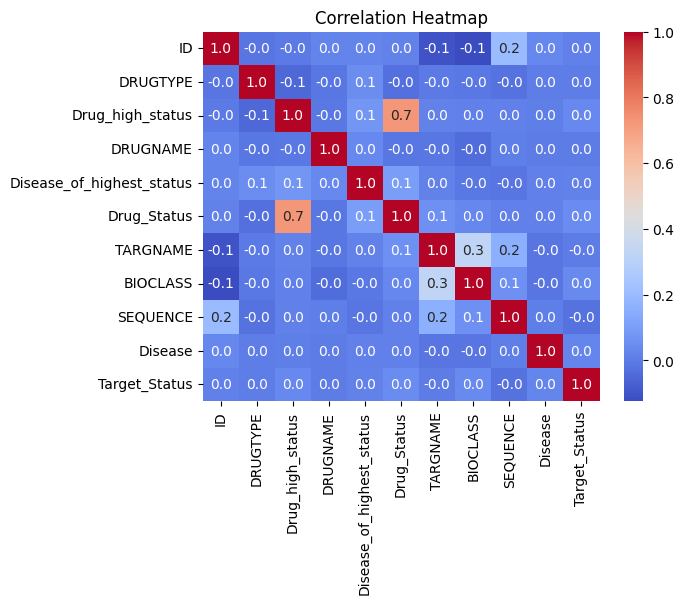

In [ ]:
sns.heatmap(df2.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

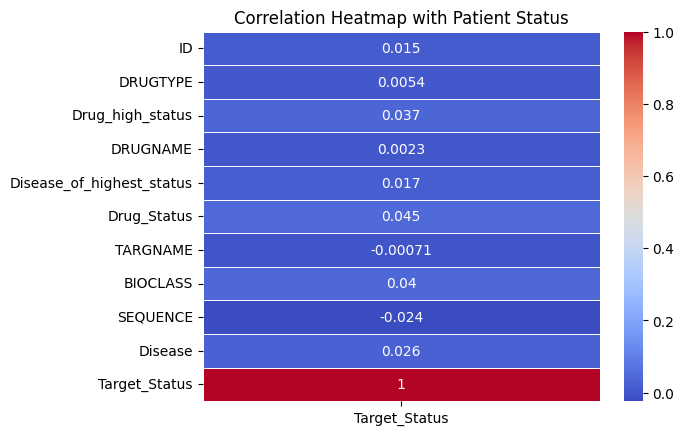

In [ ]:
correlation_matrix = df2.corr()

patient_status_corr = correlation_matrix[['Target_Status']]

sns.heatmap(patient_status_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Patient Status')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df2.drop('Target_Status', axis=1)
y = df2['Target_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df3.drop('Target_Status', axis=1)
y = df3['Target_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df1.drop('Target_Status', axis=1)
y = df1['Target_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred_1 = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_1)
print('Accuracy:', accuracy*100)
print('Classification report:')
print(classification_report(y_test, y_pred_1))

Accuracy: 84.58621458844524
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.84      0.90      0.87      6168
           2       0.92      0.69      0.79        32
           3       0.00      0.00      0.00         1
           4       0.88      0.76      0.82        70
           5       0.82      0.75      0.79       475
           6       0.54      0.58      0.56        24
           7       0.81      0.77      0.79      1177
           8       0.50      0.45      0.48        11
           9       0.75      1.00      0.86         3
          10       0.79      0.69      0.74       506
          11       1.00      0.50      0.67         4
          12       0.87      0.65      0.74        20
          13       1.00      1.00      1.00        16
          14       0.84      0.81      0.83      1866
          15       0.89      0.89      0.89       628
          16       1.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred_1 = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_1)
print('Accuracy:', accuracy*100)
print('Classification report:')
print(classification_report(y_test, y_pred_1))

Accuracy: 75.97962673804743
Classification report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.78      0.84      0.80      6168
           2       0.90      0.59      0.72        32
           3       0.00      0.00      0.00         1
           4       0.74      0.56      0.63        70
           5       0.74      0.65      0.69       475
           6       0.42      0.33      0.37        24
           7       0.72      0.67      0.69      1177
           8       0.50      0.55      0.52        11
           9       0.67      0.67      0.67         3
          10       0.69      0.59      0.64       506
          11       1.00      0.50      0.67         4
          12       0.77      0.50      0.61        20
          13       1.00      1.00      1.00        16
          14       0.73      0.69      0.71      1866
          15       0.82      0.80      0.81       628
          16       0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred_1 = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_1)
print('Accuracy:', accuracy*100)
print('Classification report:')
print(classification_report(y_test, y_pred_1))

Accuracy: 63.94899249014797
Classification report:
              precision    recall  f1-score   support

           0       0.10      0.15      0.12        13
           1       0.67      0.72      0.69      6168
           2       0.79      0.59      0.68        32
           3       0.00      0.00      0.00         1
           4       0.80      0.57      0.67        70
           5       0.53      0.48      0.50       475
           6       0.19      0.17      0.18        24
           7       0.53      0.52      0.53      1177
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         3
          10       0.49      0.41      0.45       506
          11       0.25      0.25      0.25         4
          12       0.11      0.10      0.10        20
          13       0.94      0.94      0.94        16
          14       0.59      0.56      0.58      1866
          15       0.69      0.65      0.67       628
          16       0.20      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred_2 = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_2)
print('Accuracy:', accuracy*100)
print('Classification report:')
print(classification_report(y_test, y_pred_2))

Accuracy: 23.012863409918953
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.23      0.72      0.35      6168
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00       475
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00      1177
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00       506
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00      1866
          15       0.00      0.00      0.00       628
          16       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
